On implémente le modèle SVM. D'abord, on importe les bibliothèques nécessaires.

In [8]:
# Importer les bibliothèques nécessaires

# Pour manipuler les bases de données et les graphes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Pour le ML
# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


Ensuite, on charge la base de données, et on la retravaille.

In [29]:
# Charger le jeu de données
path = "/home/onyxia/work/projet-python/"
#enlever work si nécessaire
file_name1 = "dataset_complet_part_1.csv"
file_name2 = "dataset_complet_part_2.csv"
df1 = pd.read_csv(path+file_name1, sep=',',low_memory=False)
df2 = pd.read_csv(path+file_name2, sep=',',low_memory=False)
df = pd.concat([df1,df2])

df = df.loc[df['an'] == 2019]
df['grav'] = df['grav'].replace({1:0,2:0,3:1,4:1})

df = df.drop(columns=['Num_Acc','an','adr','lat','long','lartpc','larrout','com','gps','voie','dep','v2','pr','pr1'])
#ici on enlève an car on ne regarde que pour 2019
df['hrmn'] = df['hrmn'].str.split(':').str[0]

df.to_csv('svm.csv', index=False)

y = df['grav']
X = df.drop(columns=['grav'])
features = X.columns

In [30]:
print(X.head())
print(y.head())
print(features)

        mois  jour hrmn  lum  agg  int  atm  col  catr   v1  circ nbv  vosp  \
362128  11.0  30.0   01  4.0  1.0  1.0  1.0  2.0   1.0  0.0   3.0  10   0.0   
362129  11.0  30.0   02  3.0  1.0  1.0  1.0  6.0   1.0  0.0   1.0   2   0.0   
362130  11.0  28.0   15  1.0  1.0  1.0  1.0  4.0   1.0  0.0   3.0   8   0.0   
362131  11.0  30.0   20  5.0  1.0  1.0  1.0  4.0   1.0  0.0   3.0   5   0.0   
362132  11.0  30.0   04  3.0  1.0  1.0  1.0  2.0   1.0  0.0   1.0   3   0.0   

        prof  plan  surf  infra  situ   vma  
362128   1.0   2.0   1.0    2.0   1.0  70.0  
362129   4.0   2.0   1.0    0.0   1.0  70.0  
362130   1.0   3.0   1.0    0.0   1.0  90.0  
362131   1.0   1.0   1.0    0.0   1.0  90.0  
362132   1.0   3.0   1.0    2.0   1.0  90.0  
362128    0
362129    0
362130    0
362131    0
362132    0
Name: grav, dtype: int64
Index(['mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'col', 'catr', 'v1',
       'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma'],
     

In [20]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Créer un objet imputer
imputer = SimpleImputer(strategy='mean')
# On impute la moyenne arbitrairement

# Appliquer l'imputation aux données d'entraînement
X_train = imputer.fit_transform(X_train)

# Appliquer l'imputation aux données de test
X_test = imputer.transform(X_test)

# Normaliser les fonctionnalités (pour la mise à l'échelle)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Créer un classifieur SVM
svm_classifier = SVC(kernel='linear', random_state=42)

In [22]:
# Entraîner le modèle SVM
svm_classifier.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm_classifier.predict(X_test)

In [23]:
# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6994674824382506


On regarde enfin l'importance de chaque feature.

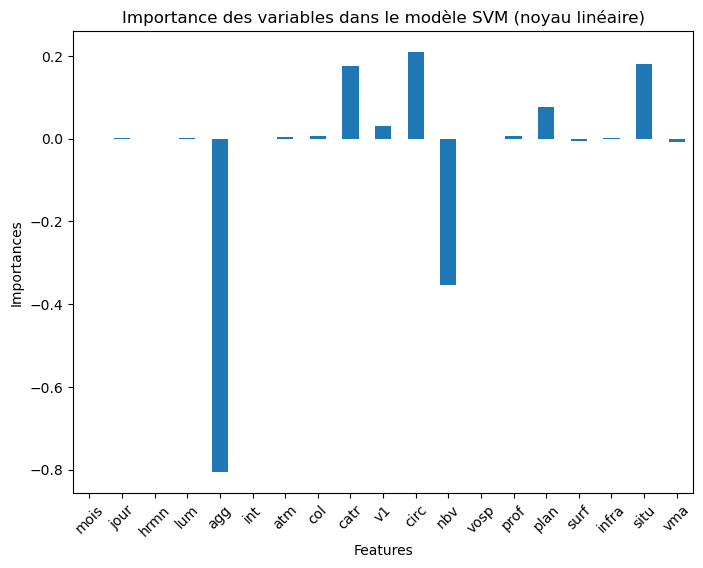

In [32]:
coefficients = pd.Series(svm_classifier.coef_[0], index=features)

# Afficher les coefficients sur un graphe
plt.figure(figsize=(8, 6))
coefficients.plot(kind='bar')
plt.title('Importance des variables dans le modèle SVM (noyau linéaire)')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation=45)
plt.show()